<a href="https://colab.research.google.com/github/saiharishsarma/Bike-Sharing-Prediction-Project/blob/main/Bike%20Sharing%20Prediction%20Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title**
# Bike Sharing Demand Prediction

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **Project Summary**

## Data Description:



*  Date - Date
*  Hour - Hour of the day (0-23)
*  Temperature - Temperature of the day
*  Humidity - Humidity measure
*  Windspeed - Windspeed  
*  Visibility - Visibility measure 
*  Dew Point Temperature - Dew point Temperature measure
*  Solar Radiation - Solar Radiation
*   Rainfall - Rainfall in mm 
*  Snowfall - Snowfall measure  
*  Seasons - 1 = Spring, 2 = Summer, 3= fall, 4 = winter 
*  Holiday - Whether a holiday or not
*  Functional Day - Whether a functional day or not















# **Git Hub Link -**

## **Problem Statement**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **General Guidelines**

# **1. Let's Begin**

**1.1 Importing necessary Libraries**

In [1]:
### Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import skew

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import metrics
from sklearn.metrics import *

!pip install SHAP
import shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 9.2 MB/s eta 0:00:00


**1.2 Importing Data Set**

In [2]:
### Loading Data Set
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
### Creating an object containing File Path of the data set and inducting to Data Frame
File_path ='/content/drive/MyDrive/Colab Notebooks/Regression Project/SeoulBikeData.csv'
data = pd.read_csv(File_path, encoding = 'unicode_escape')

# **2. Data Cleaning**

In [4]:
### Getting information about no. of columns, names, data type, count and memory size of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
### Getting info about null / NaN values count in each column
data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [6]:
### Getting Dataframe of sample size of 5 from the begining
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
### Getting Dataframe of sample size of 5 from the end
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [8]:
## Convering Data type of Date Column to Date Time Format
data['Date'] = pd.to_datetime(data['Date'])

In [9]:
## Extracting Week Day, Month, Year from Date
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year


In [10]:
## Renaming Columns
data = data.rename(columns={'Rented Bike Count': 'Rented_Bike_Count', 'Temperature(°C)': 'Temperature', 
                     'Humidity(%)': 'Humidity',	'Wind speed (m/s)': 'Wind_speed',	'Visibility (10m)': 'Visibility',
                     'Dew point temperature(°C)'	:'Dew_point',  'Solar Radiation (MJ/m2)': 'Solar_Radiation',
                     'Rainfall(mm)': 'Rainfall',	'Snowfall (cm)': 'Snowfall', 'Functioning Day': 'Functioning_Day'})

In [11]:
### Dropping Date Column after extraction
data.drop(columns = ['Date'], inplace =True)

# **3. Exploratory Data Analysis**

Our Target Variable is Rented_Bike_Count, i.e., it depends on remaining features.

Prime goal of EDA is to know dependancy of target fearure with each input/ independant feature.



**3.1 Rented_Bike_Count vs Month**

Text(0.5, 1.0, 'Rented_Bike_Count vs Month')

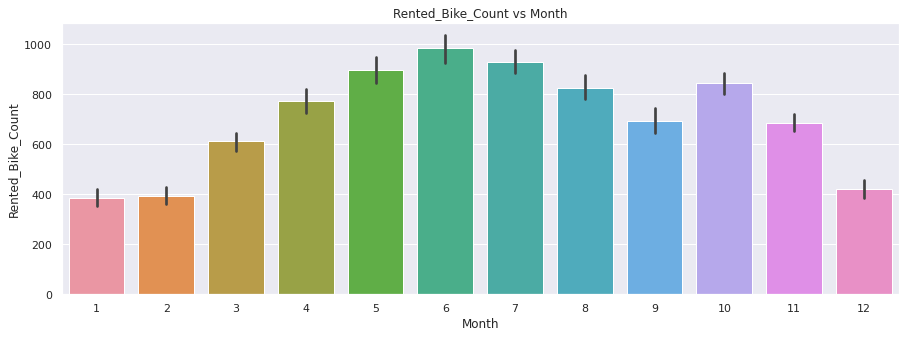

In [12]:
### 1. Data Visualization
fig= plt.subplots(figsize= (15,5))
sns.barplot(data = data, y= 'Rented_Bike_Count', x= 'Month')
plt.title('Rented_Bike_Count vs Month')


From the above Bar Graph, it is very clear that the demand for bikes is high in between the month of MAY and OCTOBER.

**3.2 Rented_Bike_Count vs Hour**

Text(0.5, 1.0, 'Rented_Bike_Count vs Hour')

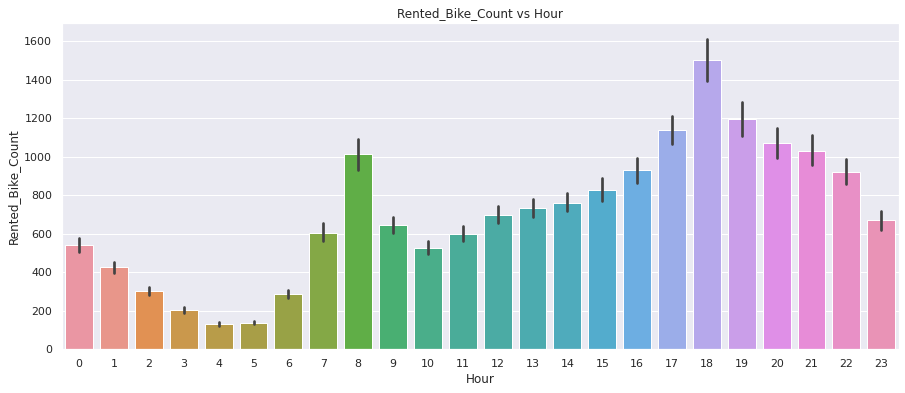

In [13]:
### 2. Data Visualization
fig=plt.subplots(figsize=(15,6))
sns.barplot(data = data, y= 'Rented_Bike_Count', x= 'Hour')
plt.title('Rented_Bike_Count vs Hour')

We can observe here that, the bikes are using while reaching and leaving office hours.

**3.3 Rented_Bike_Count vs Seaso**n

Text(0.5, 1.0, 'Rented_Bike_Count vs Seasons')

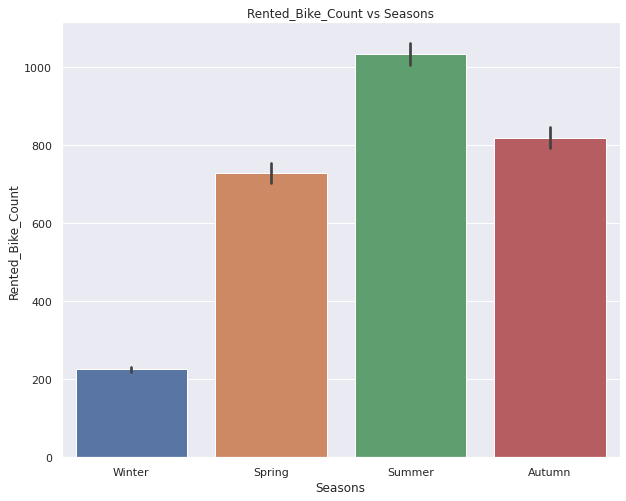

In [14]:
### 3. Data Visualization
fig=plt.subplots(figsize=(10,8))
sns.barplot(data=data,x='Seasons',y='Rented_Bike_Count')
plt.title('Rented_Bike_Count vs Seasons')

**3.4 Rented_Bike_Count vs Hour along Season**

Text(0.5, 1.0, 'Rented_Bike_Count vs Hours along with Seasons')

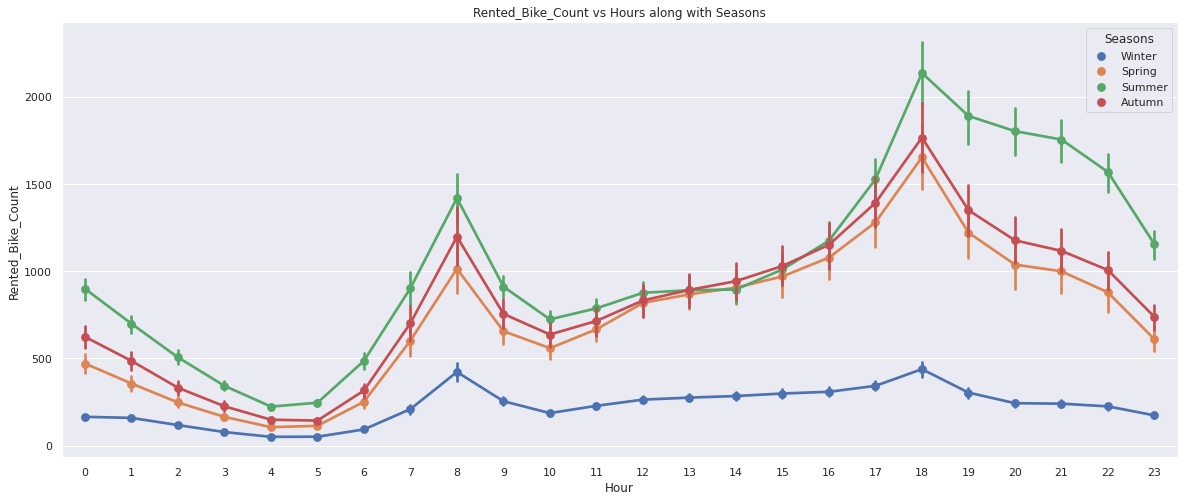

In [15]:
### 4. Data Visualization
fig=plt.subplots(figsize=(20,8))
sns.pointplot(x=data['Hour'], y=data['Rented_Bike_Count'], hue = data['Seasons'])
plt.title('Rented_Bike_Count vs Hours along with Seasons')

From the above two graphs,it is visible that the count of rental bikes is high in summer.

**3.5 Remaining Numeric Columns Using For Loop**

We can get graphical comparision between our target i.e, Rental_Bike_Count and remaining numerical variables

In [16]:
num_cols = list(data.select_dtypes(['int64', 'float64']).columns)
num_features = pd.Index(num_cols)
num_features

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'Month', 'Year'],
      dtype='object')

In [17]:
ind_var= list(num_features[1:-1])
ind_var

['Hour',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall',
 'Month']

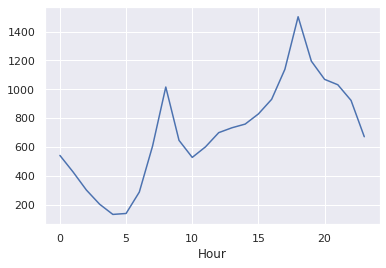

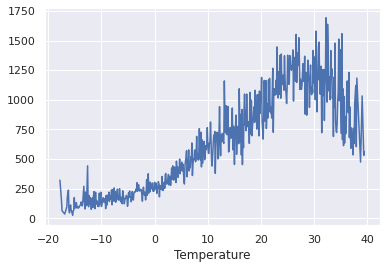

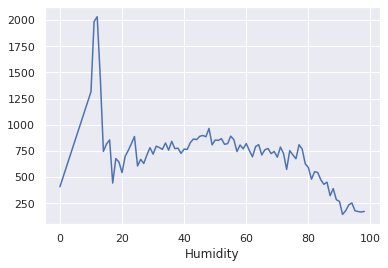

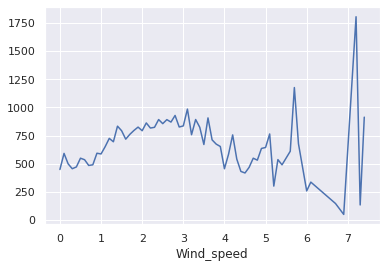

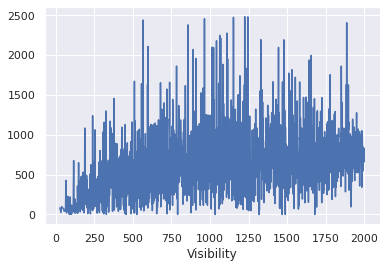

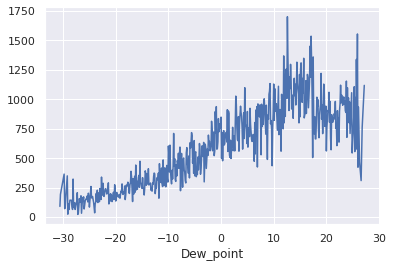

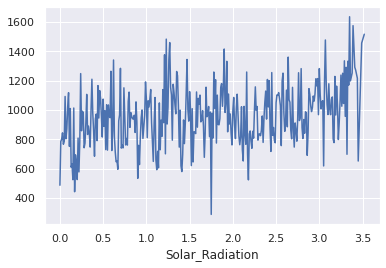

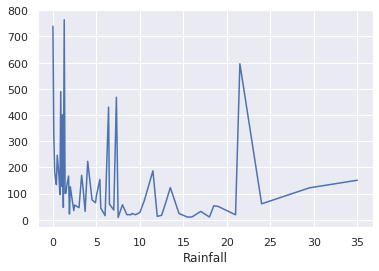

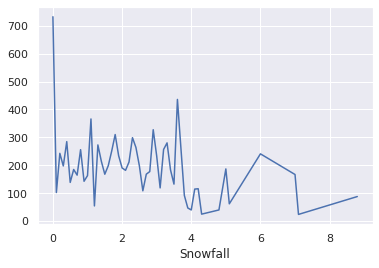

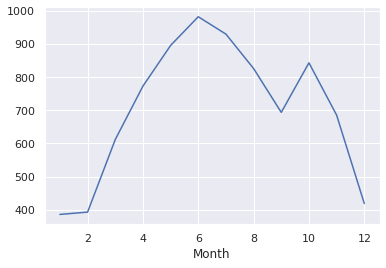

In [18]:
for i in ind_var:
  ind_var_compare = data.groupby(i).mean()['Rented_Bike_Count']
  ind_var_compare.plot()
  plt.xlabel(i)
  plt.show()


**3.6 Distribution of each numeric variable across the data set**

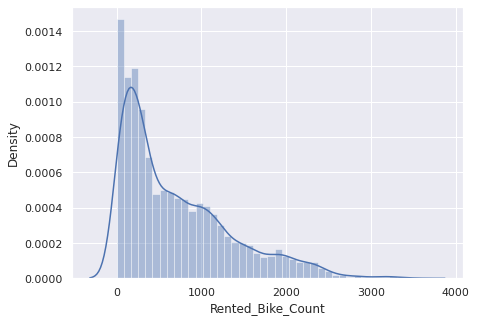

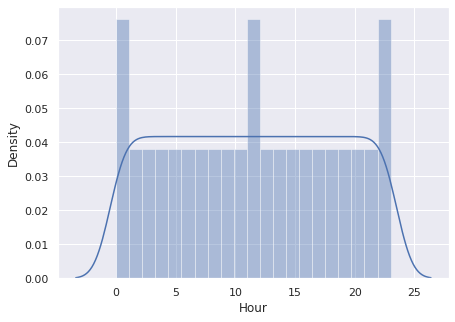

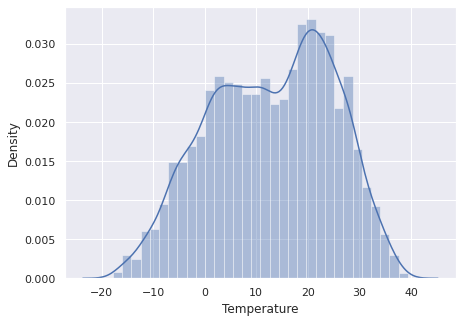

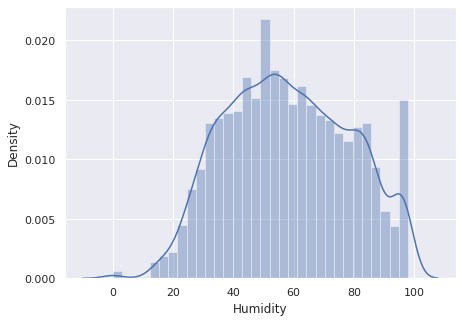

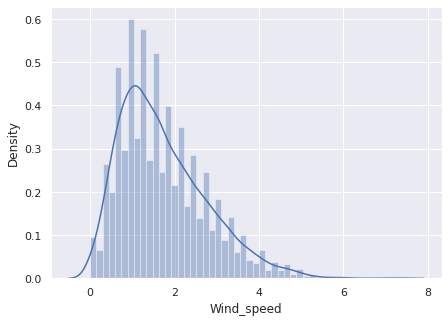

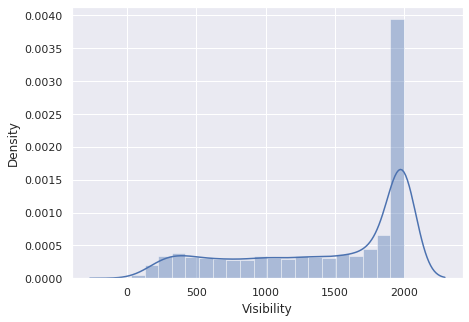

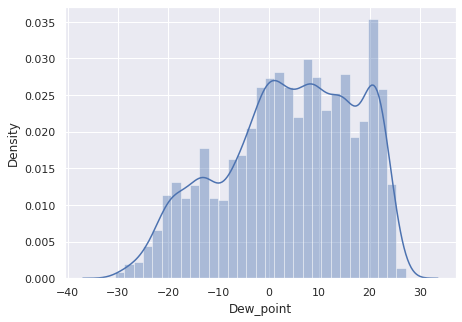

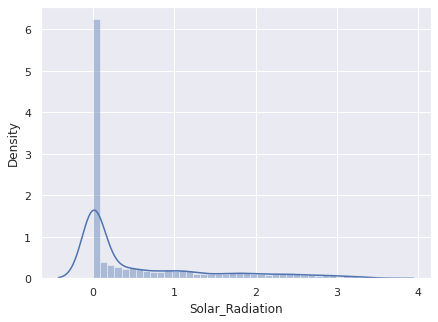

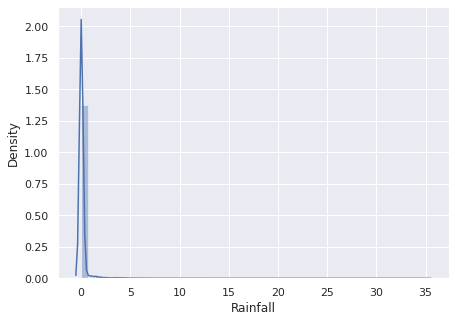

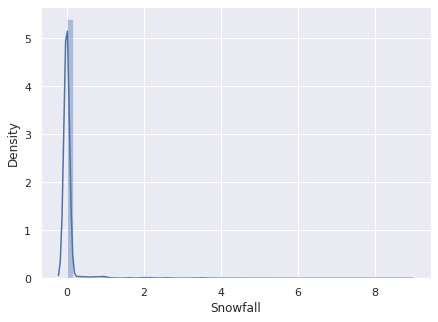

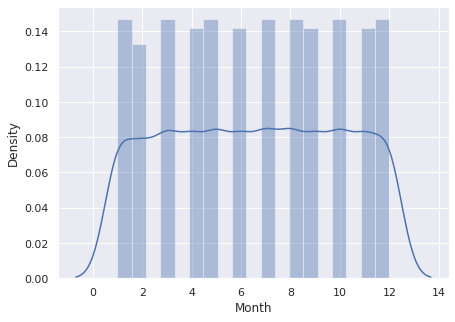

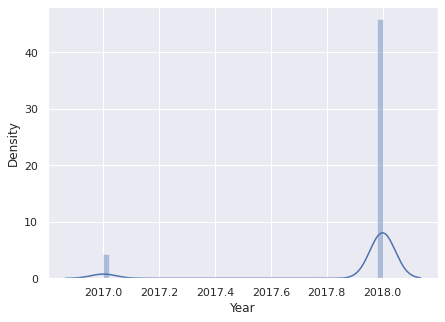

In [19]:
for i in num_features:
  plt.figure(figsize=(7,5))
  sns.distplot(x=data[i])
  plt.xlabel(i)
plt.show()

# **4. Feature Engineering**

**4.1 Feature Encoding**

**4.1.1 Season Column Encoding**

In [20]:
data['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [21]:
Season_dummy = pd.DataFrame(pd.get_dummies(data['Seasons']))
Season_dummy.head(2)

,Autumn,Spring,Summer,Winter
0,0,0,0,1
1,0,0,0,1


In [22]:
for i in Season_dummy:
  data[i]=Season_dummy[i]

In [23]:
data.drop('Seasons', axis=1, inplace=True)

In [24]:
data.head(2)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point,Solar_Radiation,Rainfall,Snowfall,Holiday,Functioning_Day,Month,Year,Autumn,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,1,2017,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,1,2017,0,0,0,1


**4.1.2 Holiday Column Encoding**

In [25]:
data['Holiday']=np.where(data['Holiday']=='Holiday',1,0)

**4.1.3 Functional Day Encoding**

In [26]:
data['Functioning_Day']=np.where(data['Functioning_Day']=='Yes',1,0)

In [27]:
data.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point,Solar_Radiation,Rainfall,Snowfall,Holiday,Functioning_Day,Month,Year,Autumn,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,1,2017,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,1,2017,0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,1,2017,0,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,1,2017,0,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,1,2017,0,0,0,1


**4.2 Correlation Check**

<function matplotlib.pyplot.show(close=None, block=None)>

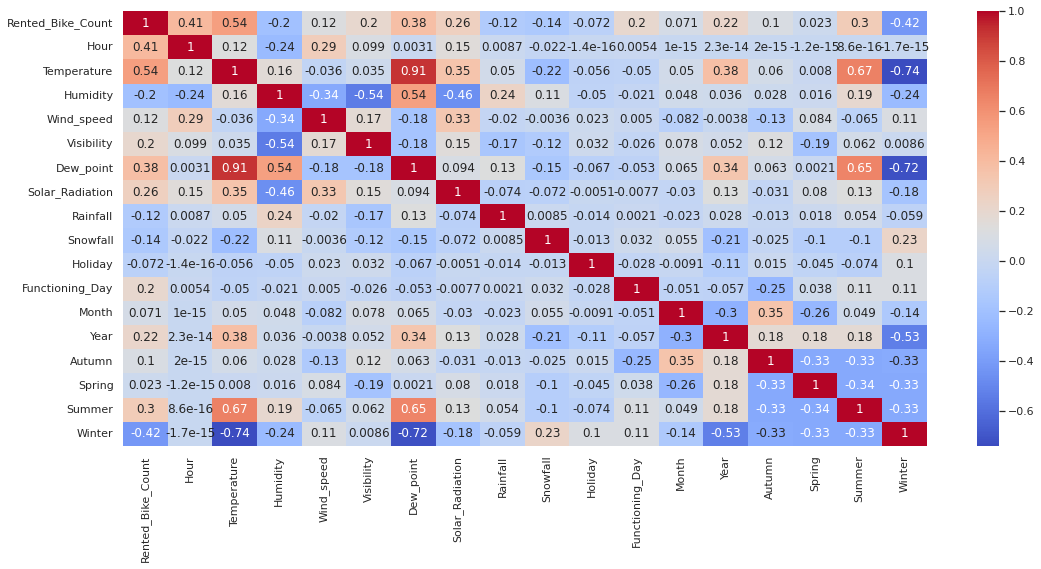

In [28]:
## Using Heatmap among all features
plt.figure(figsize=(18,8))
sns.heatmap(data.corr(),annot= True, cmap='coolwarm')
plt.show

Here is the list of most correlated features with target variable (Rented_Bike_Count):

Positive Correlation:
1. Temperature 
2. Dew Point Temperature
3.Solar Radiation

Negative correlation:
1. Winter
2. Humidity
3. Snowfall

The feature Dew Point Temperature is positively and highly correlated with Temperature.

There will be no effect in our model if Dew Point Temp. variable is removed.


In [29]:
### Dropping Dew_Point Column
data.drop('Dew_point', axis= 1, inplace=True)

In [30]:
data.head(2)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Holiday,Functioning_Day,Month,Year,Autumn,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,1,2017,0,0,0,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,1,2017,0,0,0,1


**4.3 Outliers Treatment**

In [31]:
### Creating Data Frame with Independant Variables
ind_df = data.drop('Rented_Bike_Count',axis=1)
ind_df.head(2)

,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Holiday,Functioning_Day,Month,Year,Autumn,Spring,Summer,Winter
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,1,2017,0,0,0,1
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,1,2017,0,0,0,1


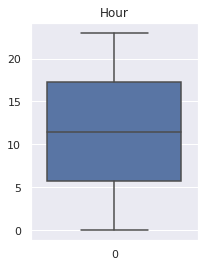

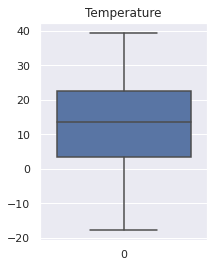

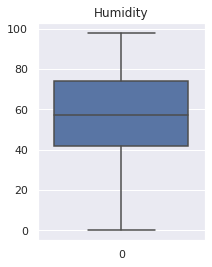

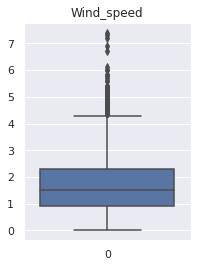

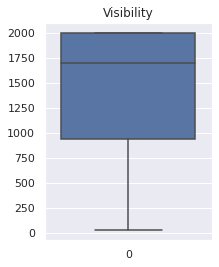

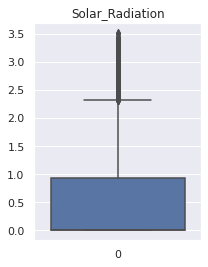

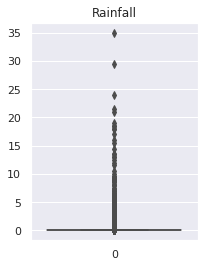

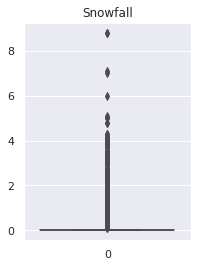

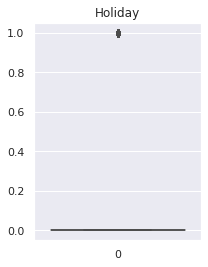

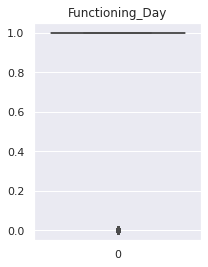

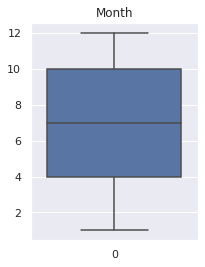

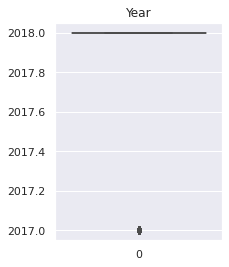

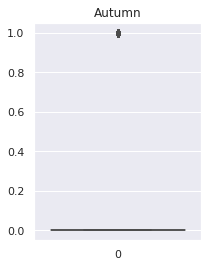

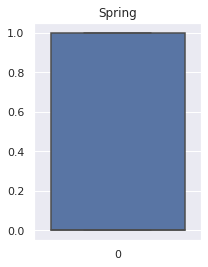

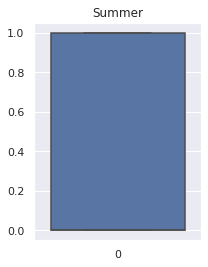

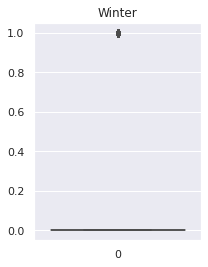

In [35]:
for i in ind_df:
  plt.figure(figsize=(3,4))
  sns.boxplot(data[i])
  plt.title(i)

In [36]:
outl_cols= ['Wind_speed', 'Visibility','Solar_Radiation','Rainfall','Snowfall']

In [39]:
### Creating Quartile 1 (25 %)  from each feature
Q1=data[outl_cols].quantile(0.25)
Q1

Wind_speed           0.9
Visibility         940.0
Solar_Radiation      0.0
Rainfall             0.0
Snowfall             0.0
Name: 0.25, dtype: float64

In [40]:
### Creating Quartile 3 (75 %)  from each feature
Q3=data[outl_cols].quantile(0.75)
Q3


Wind_speed            2.30
Visibility         2000.00
Solar_Radiation       0.93
Rainfall              0.00
Snowfall              0.00
Name: 0.75, dtype: float64

In [41]:
###### Creating Inter Quartile Range using Q1 and Q3  from each feature
IQR =Q3-Q1
IQR

Wind_speed            1.40
Visibility         1060.00
Solar_Radiation       0.93
Rainfall              0.00
Snowfall              0.00
dtype: float64

In [42]:
### Creating formula for Upper and Lower limits for each feature
u_lim= Q3+ 1.5*(IQR)
l_lim= Q1- 1.5*(IQR)

In [43]:
data[outl_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Wind_speed,8760.0,1.724909,1.036300,0.0,0.9,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.0,1698.00,2000.00,2000.00
Solar_Radiation,8760.0,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall,8760.0,0.148687,1.128193,0.0,0.0,0.00,0.00,35.00
Snowfall,8760.0,0.075068,0.436746,0.0,0.0,0.00,0.00,8.80


In [44]:
data[outl_cols].isnull().sum()

Wind_speed         0
Visibility         0
Solar_Radiation    0
Rainfall           0
Snowfall           0
dtype: int64

In [45]:
### Removing Data outside the Upper and Lower limit in columns ('Outlieng Data Removal')
data[outl_cols] = data[outl_cols][~((data[outl_cols] < l_lim) | (data[outl_cols] > u_lim))]
data[outl_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Wind_speed,8599.0,1.665740,0.947656,0.0,0.9,1.5,2.30,4.30
Visibility,8760.0,1436.825799,608.298712,27.0,940.0,1698.0,2000.00,2000.00
Solar_Radiation,8119.0,0.395010,0.626820,0.0,0.0,0.0,0.61,2.32
Rainfall,8232.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.00
Snowfall,8317.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.00


In [46]:
### After Outlieng Data Removal, checking for null/ NaN values
data[outl_cols].isnull().sum()

Wind_speed         161
Visibility           0
Solar_Radiation    641
Rainfall           528
Snowfall           443
dtype: int64

**Imputing with Median**

In [47]:
### Imputing the Null values with the median value of respected feature
data['Wind_speed'].fillna(data['Wind_speed'].median(), inplace=True)
data['Solar_Radiation'].fillna(data['Solar_Radiation'].median(), inplace=True)
data['Visibility'].fillna(data['Visibility'].median(), inplace=True)
data['Rainfall'].fillna(data['Rainfall'].median(), inplace=True)
data['Snowfall'].fillna(data['Snowfall'].median(), inplace=True)



In [48]:
data[outl_cols].describe()

,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.0,8760.0
mean,1.662694,1436.825799,0.366106,0.0,0.0
std,0.939170,608.298712,0.612155,0.0,0.0
min,0.000000,27.000000,0.000000,0.0,0.0
25%,0.900000,940.000000,0.000000,0.0,0.0
50%,1.500000,1698.000000,0.000000,0.0,0.0
75%,2.300000,2000.000000,0.530000,0.0,0.0
max,4.300000,2000.000000,2.320000,0.0,0.0


In [49]:
### After Imputaion of nulls, checking for null if any
data.isna().sum()

Rented_Bike_Count    0
Hour                 0
Temperature          0
Humidity             0
Wind_speed           0
Visibility           0
Solar_Radiation      0
Rainfall             0
Snowfall             0
Holiday              0
Functioning_Day      0
Month                0
Year                 0
Autumn               0
Spring               0
Summer               0
Winter               0
dtype: int64

**Multicollinearity**

In [50]:
### Creating a Data Frame with Independant Features
ind_df= data.drop('Rented_Bike_Count', axis=1)
ind_df.head(2)

,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Holiday,Functioning_Day,Month,Year,Autumn,Spring,Summer,Winter
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,1,2017,0,0,0,1
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,1,2017,0,0,0,1


In [51]:
### Creating a Dataframe containing Varience Inflation Factor for each Independant feature
vif= pd.DataFrame()
vif['columns']= ind_df.columns
vif['vif']= [variance_inflation_factor(ind_df.values,i) for i in range(ind_df.shape[1])]
vif


,columns,vif
0,Hour,1.183026e+00
1,Temperature,4.610543e+00
2,Humidity,2.058435e+00
3,Wind_speed,1.237147e+00
4,Visibility,1.629663e+00
5,Solar_Radiation,1.271822e+00
6,Rainfall,NaN
7,Snowfall,NaN
8,Holiday,1.028030e+00
9,Functioning_Day,1.079996e+00


**Linearity Check**

In [53]:
### Extracting Coumn details from Independant Features Dataframe 
ind_cols = ind_df.columns
ind_cols

Index(['Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Holiday', 'Functioning_Day',
       'Month', 'Year', 'Autumn', 'Spring', 'Summer', 'Winter'],
      dtype='object')

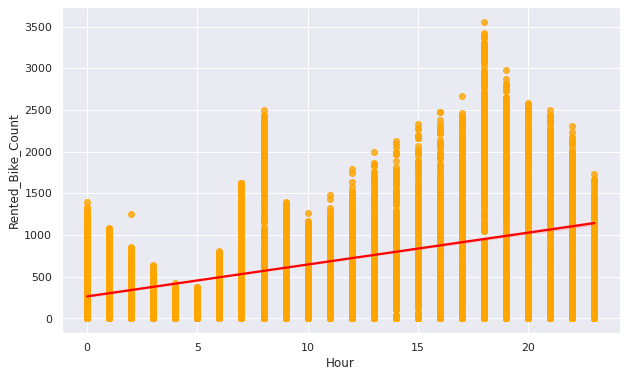

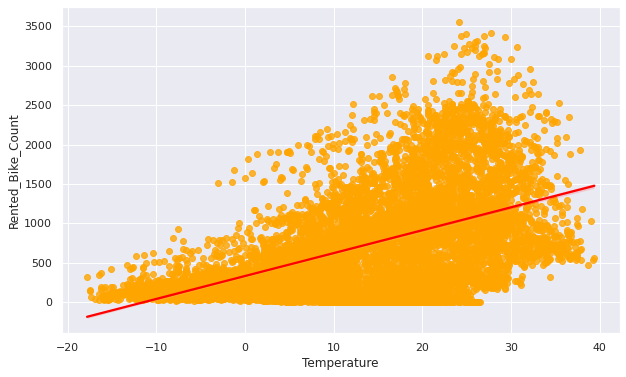

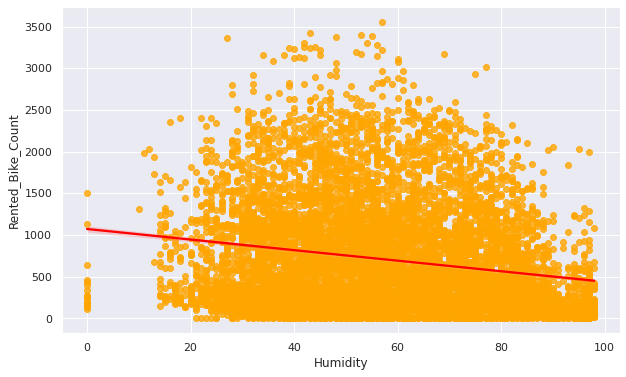

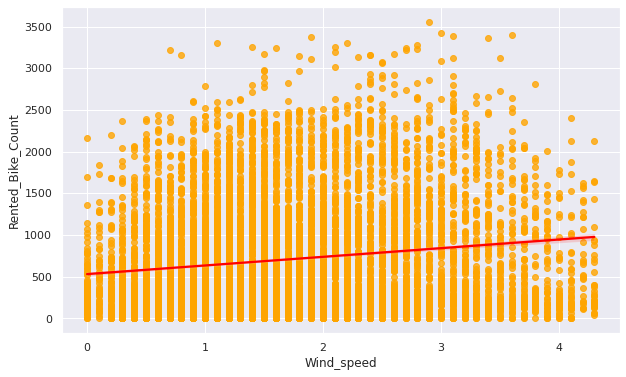

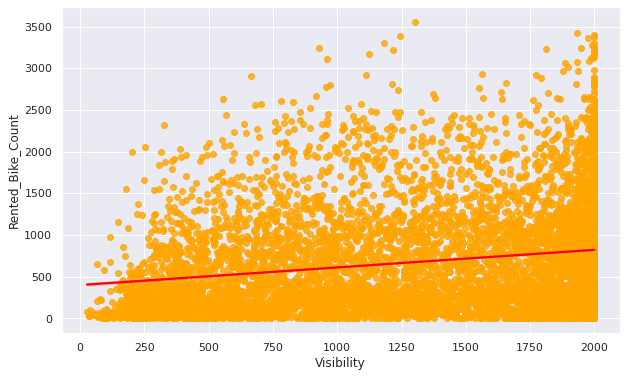

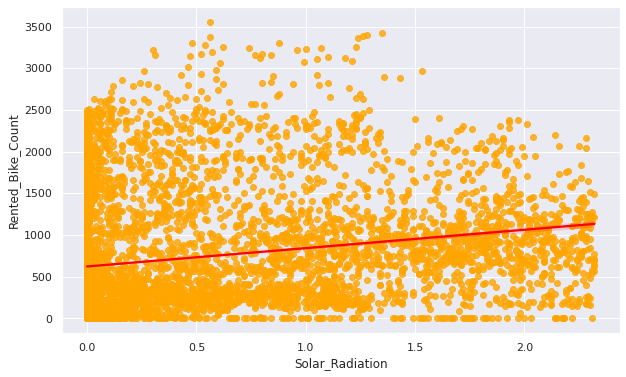

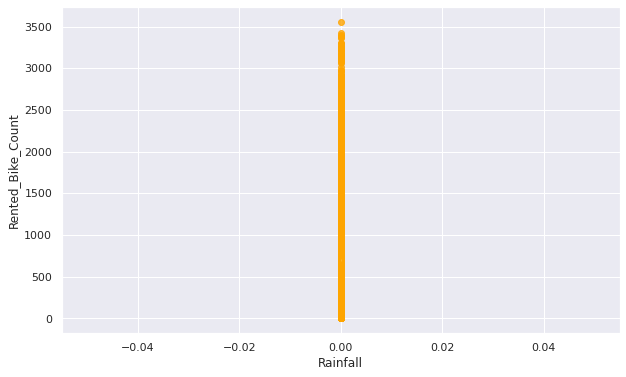

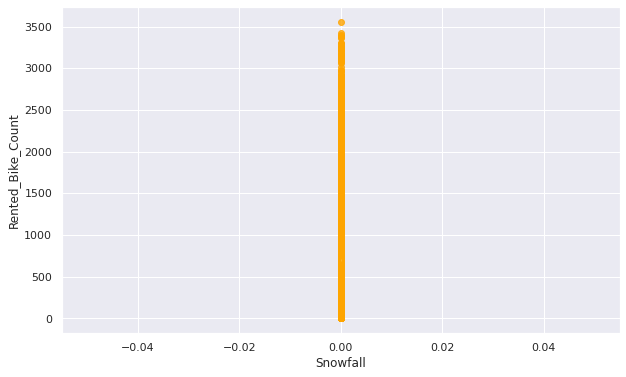

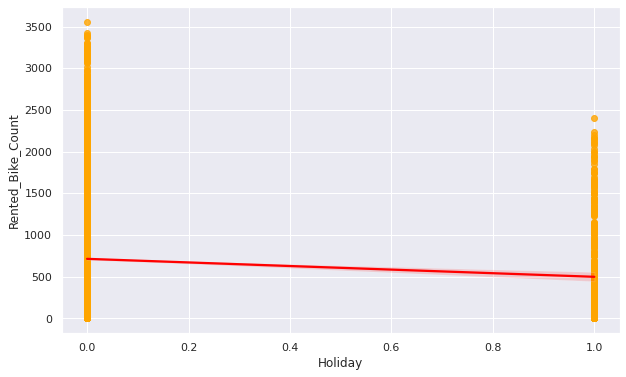

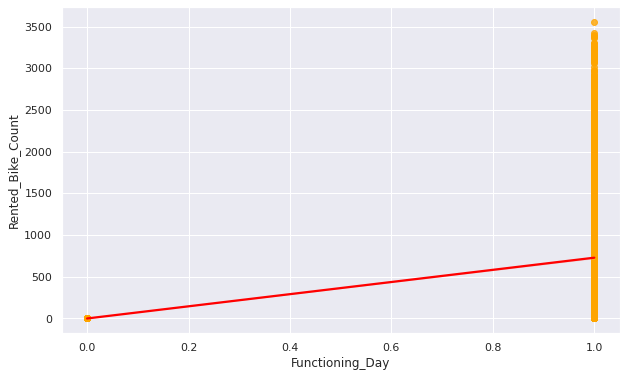

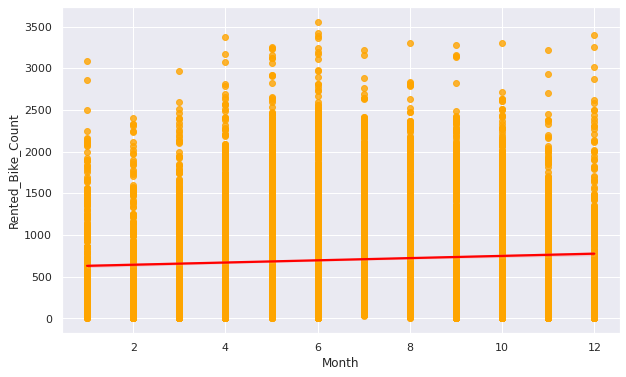

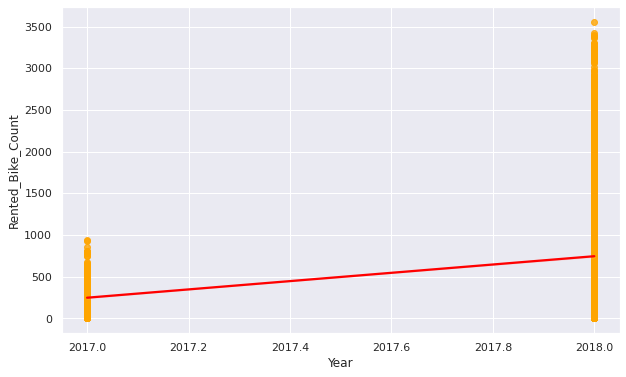

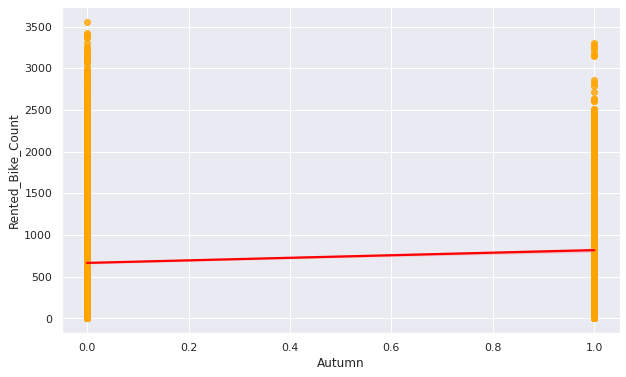

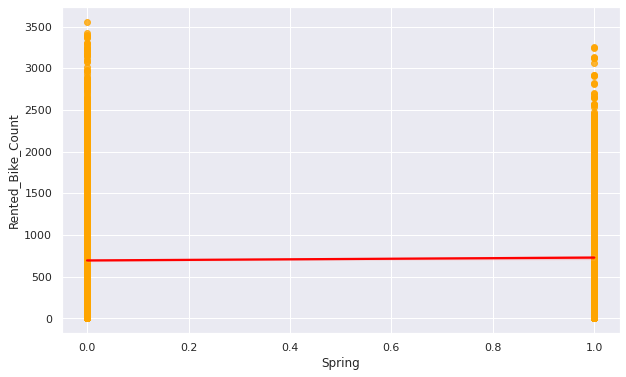

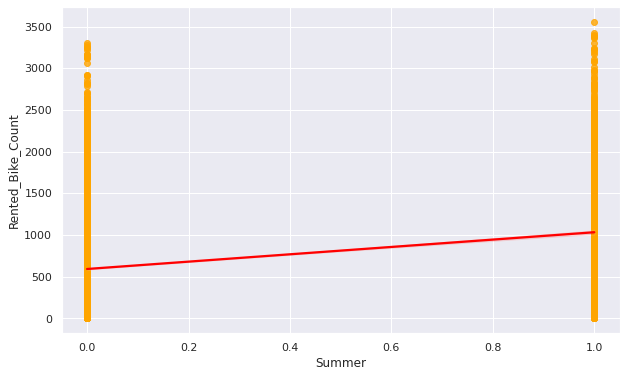

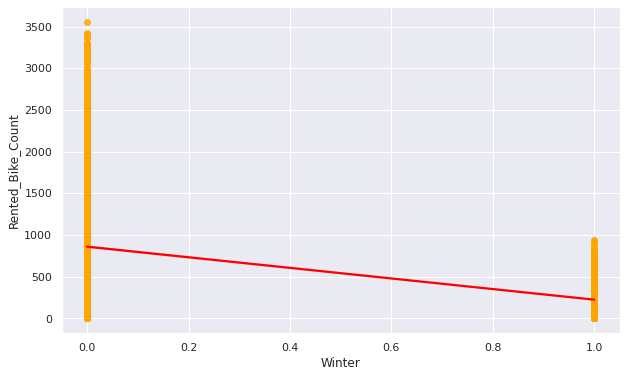

In [55]:
### Using For Loop to get graphs for each independant feature with target feature 
for i in ind_cols:
  plt.subplots(figsize=(10,6))
  sns.regplot(x=data[i], y=data['Rented_Bike_Count'], scatter_kws= {'color' : 'orange'}, line_kws={ 'color' : 'red'})
  plt.show()

All independant features are in linear relationship with the target variable.

# **5. Pre-Processing Data**

**5.1. Creating X and Y Variables**

In [56]:
## x as Independant variable
## y as dependant variable

x=data.drop(['Rented_Bike_Count'], axis=1)
y=data['Rented_Bike_Count']

In [57]:
x.head()

,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Holiday,Functioning_Day,Month,Year,Autumn,Spring,Summer,Winter
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,1,2017,0,0,0,1
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,1,2017,0,0,0,1
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,1,2017,0,0,0,1
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,1,2017,0,0,0,1
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,1,2017,0,0,0,1


# **6. Target Feature Conditioning**

The Distribution of Target Feature is to be inspected if if it is normally distributed, if not, we have to normalize the distribution using Data Transformation

In [58]:
### Getting Skewness value 
skew_y = skew(y)
skew_y

1.1532306631480034

This indicates the distribution is positively distributed.

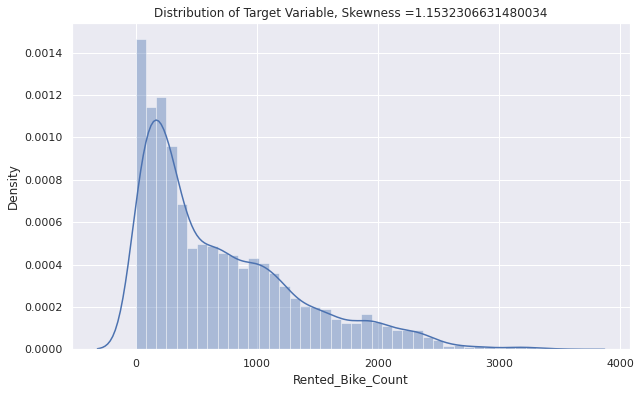

In [59]:
### Graphing Distribution of Target Feature
plt.figure(figsize=(10,6))
sns.distplot(y)
plt.title(f"Distribution of Target Variable, Skewness ={skew_y}")
plt.show()

In [60]:
## Using Log Tranformation
y= np.sqrt(y)
y

0       15.937377
1       14.282857
2       13.152946
3       10.344080
4        8.831761
          ...    
8755    31.670175
8756    27.640550
8757    26.343880
8758    26.683328
8759    24.166092
Name: Rented_Bike_Count, Length: 8760, dtype: float64

In [61]:
skew(y)

0.23732144485836718

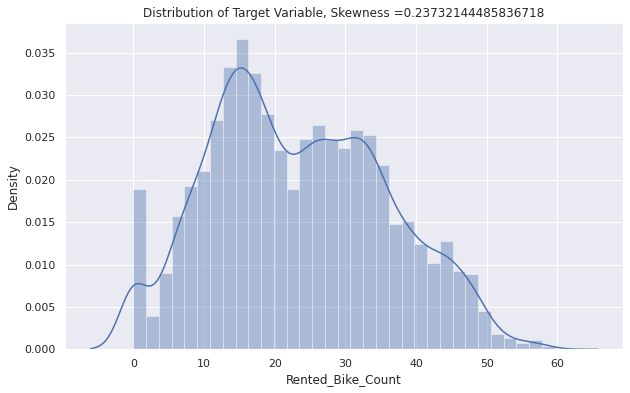

In [62]:
### Graphing Distribution of Target Feature after feature transformation
plt.figure(figsize=(10,6))
sns.distplot(y)
plt.title(f"Distribution of Target Variable, Skewness ={skew(y)}")
plt.show()

Sqrt Transformation worked out very well, the target feature is normalized.

# **7. Creating Training and Testing Set**

In [63]:
### Creating Test and Train Set of input and output variables
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.30, random_state=42)

In [64]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6132, 16), (2628, 16), (6132,), (2628,))

# **8. Feature Scalling**

In [65]:
scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.fit_transform(x_test)


In [66]:
x_train

array([[-1.09359218, -2.02557075, -0.40155174, ..., -0.5853851 ,
        -0.57986105,  1.76898076],
       [ 1.23323198, -1.58026093, -0.69489404, ..., -0.5853851 ,
        -0.57986105,  1.76898076],
       [-0.51188614, -0.13510455,  0.3806944 , ..., -0.5853851 ,
        -0.57986105, -0.56529727],
       ...,
       [ 0.36067292,  1.38567048,  0.18513286, ..., -0.5853851 ,
         1.72455109, -0.56529727],
       [ 1.23323198, -1.37861121, -0.35266136, ..., -0.5853851 ,
        -0.57986105,  1.76898076],
       [ 1.524085  ,  0.52865914, -0.15709982, ..., -0.5853851 ,
        -0.57986105, -0.56529727]])

# **9. Modeling, Evaluating and Parameter Tuning**

**1. Linear Regression**

Fitting the Model

In [69]:
model_1=LinearRegression().fit(x_train,y_train)

In [70]:
model_1.score(x_train,y_train), model_1.score(x_test,y_test)

(0.6388208407560204, 0.622310483063715)

In [71]:
model_1.coef_

array([ 3.44347399e+00,  5.09673318e+00, -3.14430579e+00,  9.02250273e-02,
        3.29599814e-01,  2.47844904e-01, -4.44089210e-16, -9.99200722e-16,
       -6.46957344e-01,  5.22892019e+00,  8.34607438e-02, -6.76237225e-01,
        1.64634705e+00,  2.41078939e-01,  3.95201814e-01, -2.31191860e+00])

In [72]:
model_1.intercept_

23.458551814426663

In [73]:
### Predicting  of Target with Training and Testing Data

y_train_predict = model_1.predict(x_train)
y_test_predict = model_1.predict(x_test)

Evaluating Model 

Training

In [74]:
### Creating Evaluation Metrics
MSE = mean_squared_error(y_train, y_train_predict)
print("MSE :",MSE)

RMSE= np.sqrt(MSE)
print("RMSE :",RMSE)

MAE= mean_absolute_error(y_train, y_train_predict)
print("MAE :",MAE)

R2_Score = r2_score(y_train, y_train_predict)
print("R2_Score :",R2_Score)

Adj_R2_Score = (1-(1-R2_Score)* (x_train.shape[0]-1) /(x_train.shape[0] - x_train.shape[1] - 1))
print("Adj_R2_Score :",Adj_R2_Score)

MSE : 56.46363499194287
RMSE : 7.514228835478919
MAE : 5.782526054972505
R2_Score : 0.6388208407560204
Adj_R2_Score : 0.6378758094317516


In [75]:
Dict= {'Model': 'Linear regression', 
         'MSE' : round(MSE,3), 'RMSE': round(RMSE,3),
         'MAE': round(MAE,3), 'R2_Score': round(R2_Score,3), 
         'Adj_R2_Score': round(Adj_R2_Score,3)}

In [76]:
### Tabulating Metrics in Dataframe
Training_DF= pd.DataFrame(Dict,index=[1])
Training_DF

,Model,MSE,RMSE,MAE,R2_Score,Adj_R2_Score
1,Linear regression,56.464,7.514,5.783,0.639,0.638


Testing

In [77]:
MSE = mean_squared_error(y_test, y_test_predict)
print("MSE :",MSE)

RMSE= np.sqrt(MSE)
print("RMSE :",RMSE)

MAE= mean_absolute_error(y_test, y_test_predict)
print("MAE :",MAE)

R2_Score = r2_score(y_test, y_test_predict)
print("R2_Score :",R2_Score)

Adj_R2_Score = (1-(1-R2_Score)* (x_test.shape[0]-1) /(x_test.shape[0] - x_test.shape[1] - 1))
print("Adj_R2_Score :",Adj_R2_Score)

MSE : 57.379608328786794
RMSE : 7.574932892691974
MAE : 5.8228045370901516
R2_Score : 0.622310483063715
Adj_R2_Score : 0.6199960317917959


In [78]:
Dict= {'Model': 'Linear regression', 
         'MSE' : round(MSE,3), 'RMSE': round(RMSE,3),
         'MAE': round(MAE,3), 'R2_Score': round(R2_Score,3), 
         'Adj_R2_Score': round(Adj_R2_Score,3)}

In [79]:
Testing_DF= pd.DataFrame(Dict,index=[1])
Testing_DF

,Model,MSE,RMSE,MAE,R2_Score,Adj_R2_Score
1,Linear regression,57.38,7.575,5.823,0.622,0.62


**2. Lasso Regression with GridSearch CV**

Fitting Model

In [80]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [81]:
Lasso = Lasso()

In [82]:
parameters={'alpha':[0.01,0.02,0.08,0.1,0.2,0.4,0.6,0.7,0.8,0.9,1.0,2,10,15,20,30,50,60,100],'max_iter':[100,500,800,1000,2000,3000,4000,5000]}
Grid_Lasso=GridSearchCV(Lasso, parameters, scoring= 'neg_mean_squared_error', cv=5)

In [83]:
Grid_Lasso.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.02, 0.08, 0.1, 0.2, 0.4, 0.6, 0.7,
                                   0.8, 0.9, 1.0, 2, 10, 15, 20, 30, 50, 60,
                                   100],
                         'max_iter': [100, 500, 800, 1000, 2000, 3000, 4000,
                                      5000]},
             scoring='neg_mean_squared_error')

In [84]:
Grid_Lasso.best_params_

{'alpha': 0.01, 'max_iter': 100}

In [85]:
Grid_Lasso.best_score_

-56.659736508971015

In [86]:
from sklearn.linear_model import Lasso

In [87]:
Lasso= Lasso(alpha=0.01, max_iter= 100)

In [88]:
model_2 = Lasso.fit(x_train, y_train)

In [89]:
model_2.score(x_train, y_train), model_2.score(x_test, y_test)

(0.6388143766387069, 0.6223898489997439)

Evaluating Model

In [90]:
y_train_predict= model_2.predict(x_train)
y_test_predict= model_2.predict(x_test)

Training

In [91]:
MSE = mean_squared_error(y_train, y_train_predict)
print("MSE :",MSE)

RMSE= np.sqrt(MSE)
print("RMSE :",RMSE)

MAE= mean_absolute_error(y_train, y_train_predict)
print("MAE :",MAE)

R2_Score = r2_score(y_train, y_train_predict)
print("R2_Score :",R2_Score)

Adj_R2_Score = (1-(1-R2_Score)* (x_train.shape[0]-1) /(x_train.shape[0] - x_train.shape[1] - 1))
print("Adj_R2_Score :",Adj_R2_Score)

MSE : 56.464645536297915
RMSE : 7.51429607723158
MAE : 5.781371705477361
R2_Score : 0.6388143766387069
Adj_R2_Score : 0.6378693284009668


In [92]:
Dict= {'Model': 'Lasso regression', 
         'MSE' : round(MSE,3), 'RMSE': round(RMSE,3),
         'MAE': round(MAE,3), 'R2_Score': round(R2_Score,3), 
         'Adj_R2_Score': round(Adj_R2_Score,3)}

In [93]:
Training_DF= Training_DF.append(Dict,ignore_index=True)
Training_DF

,Model,MSE,RMSE,MAE,R2_Score,Adj_R2_Score
0,Linear regression,56.464,7.514,5.783,0.639,0.638
1,Lasso regression,56.465,7.514,5.781,0.639,0.638


Testing

In [94]:
MSE = mean_squared_error(y_test, y_test_predict)
print("MSE :",MSE)

RMSE= np.sqrt(MSE)
print("RMSE :",RMSE)

MAE= mean_absolute_error(y_test, y_test_predict)
print("MAE :",MAE)

R2_Score = r2_score(y_test, y_test_predict)
print("R2_Score :",R2_Score)

Adj_R2_Score = (1-(1-R2_Score)* (x_test.shape[0]-1) /(x_test.shape[0] - x_test.shape[1] - 1))
print("Adj_R2_Score :",Adj_R2_Score)

MSE : 57.36755084209527
RMSE : 7.5741369701171415
MAE : 5.8217112917414795
R2_Score : 0.6223898489997439
Adj_R2_Score : 0.6200758840759584


In [95]:
Dict= {'Model': 'Lasso regression', 
         'MSE' : round(MSE,3), 'RMSE': round(RMSE,3),
         'MAE': round(MAE,3), 'R2_Score': round(R2_Score,3), 
         'Adj_R2_Score': round(Adj_R2_Score,3)}

In [96]:
Testing_DF= Testing_DF.append(Dict, ignore_index=True)
Testing_DF

,Model,MSE,RMSE,MAE,R2_Score,Adj_R2_Score
0,Linear regression,57.380,7.575,5.823,0.622,0.62
1,Lasso regression,57.368,7.574,5.822,0.622,0.62


**3. Ridge Regression with GridSearch CV**

Fitting Model

In [97]:
from sklearn.linear_model import Ridge

In [98]:
Ridge= Ridge()

In [99]:
parameters={'alpha':[0.01,0.02,0.08,0.1,0.2,0.4,0.6,0.7,0.8,0.9,1.0,2,10,15,20,30,50,60,100],'max_iter':[100,500,800,1000,2000,3000,4000,5000]}
Grid_Ridge=GridSearchCV(Ridge, parameters, scoring= 'neg_mean_squared_error', cv=5)

In [100]:
Grid_Ridge.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.02, 0.08, 0.1, 0.2, 0.4, 0.6, 0.7,
                                   0.8, 0.9, 1.0, 2, 10, 15, 20, 30, 50, 60,
                                   100],
                         'max_iter': [100, 500, 800, 1000, 2000, 3000, 4000,
                                      5000]},
             scoring='neg_mean_squared_error')

In [101]:
model_3 = Ridge.fit(x_train, y_train)

In [102]:
model_3.score(x_train, y_train), model_3.score(x_test, y_test)

(0.6388208193510738, 0.6223161309650342)

Evaluating Model

In [103]:
y_train_predict=model_3.predict(x_train)
y_test_predict=model_3.predict(x_test)

Training

In [104]:
MSE = mean_squared_error(y_train, y_train_predict)
print("MSE :",MSE)

RMSE= np.sqrt(MSE)
print("RMSE :",RMSE)

MAE= mean_absolute_error(y_train, y_train_predict)
print("MAE :",MAE)

R2_Score = r2_score(y_train, y_train_predict)
print("R2_Score :",R2_Score)

Adj_R2_Score = (1-(1-R2_Score)* (x_train.shape[0]-1) /(x_train.shape[0] - x_train.shape[1] - 1))
print("Adj_R2_Score :",Adj_R2_Score)

MSE : 56.46363833820763
RMSE : 7.5142290581408036
MAE : 5.782549440079437
R2_Score : 0.6388208193510738
Adj_R2_Score : 0.6378757879707986


In [105]:
Dict= {'Model': 'Ridge regression', 
         'MSE' : round(MSE,3), 'RMSE': round(RMSE,3),
         'MAE': round(MAE,3), 'R2_Score': round(R2_Score,3), 
         'Adj_R2_Score': round(Adj_R2_Score,3)}

In [106]:
Training_DF= Training_DF.append(Dict,ignore_index=True)
Training_DF

,Model,MSE,RMSE,MAE,R2_Score,Adj_R2_Score
0,Linear regression,56.464,7.514,5.783,0.639,0.638
1,Lasso regression,56.465,7.514,5.781,0.639,0.638
2,Ridge regression,56.464,7.514,5.783,0.639,0.638


Testing

In [107]:
MSE = mean_squared_error(y_test, y_test_predict)
print("MSE :",MSE)

RMSE= np.sqrt(MSE)
print("RMSE :",RMSE)

MAE= mean_absolute_error(y_test, y_test_predict)
print("MAE :",MAE)

R2_Score = r2_score(y_test, y_test_predict)
print("R2_Score :",R2_Score)

Adj_R2_Score = (1-(1-R2_Score)* (x_test.shape[0]-1) /(x_test.shape[0] - x_test.shape[1] - 1))
print("Adj_R2_Score :",Adj_R2_Score)

MSE : 57.378750284411595
RMSE : 7.574876255386064
MAE : 5.822804491087754
R2_Score : 0.6223161309650342
Adj_R2_Score : 0.6200017143030045


In [108]:
Dict= {'Model': 'Ridge regression', 
         'MSE' : round(MSE,3), 'RMSE': round(RMSE,3),
         'MAE': round(MAE,3), 'R2_Score': round(R2_Score,3), 
         'Adj_R2_Score': round(Adj_R2_Score,3)}

In [109]:
Testing_DF= Testing_DF.append(Dict, ignore_index=True)
Testing_DF

,Model,MSE,RMSE,MAE,R2_Score,Adj_R2_Score
0,Linear regression,57.380,7.575,5.823,0.622,0.62
1,Lasso regression,57.368,7.574,5.822,0.622,0.62
2,Ridge regression,57.379,7.575,5.823,0.622,0.62


**Random Forest with GridSearch CV**

Fitting Model

In [110]:
RFR= RandomForestRegressor()

In [111]:
parameters={'n_estimators': [10,50,100],
            'min_samples_split': [2,4],
            'max_depth' : [3,6,9]}
Grid_RFR=GridSearchCV(RFR, parameters, scoring= 'neg_mean_squared_error', cv=5)

In [112]:
Grid_RFR.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 6, 9], 'min_samples_split': [2, 4],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error')

In [113]:
Grid_RFR.best_params_

{'max_depth': 9, 'min_samples_split': 2, 'n_estimators': 100}

In [114]:
Grid_RFR.best_score_

-20.983215071257796

In [115]:
RFR= RandomForestRegressor(max_depth=9, min_samples_split=4, n_estimators=100)

In [116]:
model_4=RFR.fit(x_train,y_train)

In [117]:
model_4.score(x_train,y_train), model_4.score(x_test,y_test)

(0.9088946434116718, 0.8583027015896725)

Evaluating Model

In [118]:
y_train_predict =model_4.predict(x_train)
y_test_predict = model_4.predict(x_test)

Training

In [119]:
MSE = mean_squared_error(y_train, y_train_predict)
print("MSE :",MSE)

RMSE= np.sqrt(MSE)
print("RMSE :",RMSE)

MAE= mean_absolute_error(y_train, y_train_predict)
print("MAE :",MAE)

R2_Score = r2_score(y_train, y_train_predict)
print("R2_Score :",R2_Score)

Adj_R2_Score = (1-(1-R2_Score)* (x_train.shape[0]-1) /(x_train.shape[0] - x_train.shape[1] - 1))
print("Adj_R2_Score :",Adj_R2_Score)

MSE : 14.242625767726684
RMSE : 3.7739403503138047
MAE : 2.578753752681866
R2_Score : 0.9088946434116718
Adj_R2_Score : 0.9086562647190449


In [120]:
Dict= {'Model': 'Random Forest', 
         'MSE' : round(MSE,3), 'RMSE': round(RMSE,3),
         'MAE': round(MAE,3), 'R2_Score': round(R2_Score,3), 
         'Adj_R2_Score': round(Adj_R2_Score,3)}

In [121]:
Training_DF= Training_DF.append(Dict,ignore_index=True)
Training_DF

,Model,MSE,RMSE,MAE,R2_Score,Adj_R2_Score
0,Linear regression,56.464,7.514,5.783,0.639,0.638
1,Lasso regression,56.465,7.514,5.781,0.639,0.638
2,Ridge regression,56.464,7.514,5.783,0.639,0.638
3,Random Forest,14.243,3.774,2.579,0.909,0.909


Testing

In [122]:
MSE = mean_squared_error(y_test, y_test_predict)
print("MSE :",MSE)

RMSE= np.sqrt(MSE)
print("RMSE :",RMSE)

MAE= mean_absolute_error(y_test, y_test_predict)
print("MAE :",MAE)

R2_Score = r2_score(y_test, y_test_predict)
print("R2_Score :",R2_Score)

Adj_R2_Score = (1-(1-R2_Score)* (x_test.shape[0]-1) /(x_test.shape[0] - x_test.shape[1] - 1))
print("Adj_R2_Score :",Adj_R2_Score)

MSE : 21.52703508952147
RMSE : 4.639723600552243
MAE : 3.1409216401281146
R2_Score : 0.8583027015896725
Adj_R2_Score : 0.8574343918330408


In [123]:
Dict= {'Model': 'Random Forest', 
         'MSE' : round(MSE,3), 'RMSE': round(RMSE,3),
         'MAE': round(MAE,3), 'R2_Score': round(R2_Score,3), 
         'Adj_R2_Score': round(Adj_R2_Score,3)}

In [124]:
Testing_DF= Testing_DF.append(Dict, ignore_index=True)
Testing_DF

,Model,MSE,RMSE,MAE,R2_Score,Adj_R2_Score
0,Linear regression,57.380,7.575,5.823,0.622,0.620
1,Lasso regression,57.368,7.574,5.822,0.622,0.620
2,Ridge regression,57.379,7.575,5.823,0.622,0.620
3,Random Forest,21.527,4.640,3.141,0.858,0.857


**Gradient Boosting Regressor with GridSearch CV**

Fitting Model

In [125]:
GBM = GradientBoostingRegressor()

In [126]:
parameters={'n_estimators': [50,100],'max_depth':[3,6,9],
            'learning_rate': [0.01,0.1,1.0,2.0]}
Grid_GBM=GridSearchCV(GBM, parameters, scoring= 'neg_mean_squared_error', cv=5)

In [127]:
Grid_GBM.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0, 2.0],
                         'max_depth': [3, 6, 9], 'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error')

In [128]:
Grid_GBM.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}

In [129]:
Grid_GBM.best_score_

-17.89630757859782

In [130]:
GBM = GradientBoostingRegressor(learning_rate=0.1, max_depth=6, n_estimators=100)

In [131]:
model_5 =GBM.fit(x_train,y_train)

In [132]:
model_5.score(x_train,y_train), model_5.score(x_test,y_test)

(0.9441667091566658, 0.8725224576140802)

Evaluating Model

In [133]:
y_train_predict= model_5.predict(x_train)
y_test_predict= model_5.predict(x_test)

Training

In [134]:
MSE = mean_squared_error(y_train, y_train_predict)
print("MSE :",MSE)

RMSE= np.sqrt(MSE)
print("RMSE :",RMSE)

MAE= mean_absolute_error(y_train, y_train_predict)
print("MAE :",MAE)

R2_Score = r2_score(y_train, y_train_predict)
print("R2_Score :",R2_Score)

Adj_R2_Score = (1-(1-R2_Score)* (x_train.shape[0]-1) /(x_train.shape[0] - x_train.shape[1] - 1))
print("Adj_R2_Score :",Adj_R2_Score)

MSE : 8.728495191073403
RMSE : 2.954402679235416
MAE : 2.039733613462568
R2_Score : 0.9441667091566658
Adj_R2_Score : 0.9440206204152932


In [135]:
Dict= {'Model': 'Gradient Boosting', 
         'MSE' : round(MSE,3), 'RMSE': round(RMSE,3),
         'MAE': round(MAE,3), 'R2_Score': round(R2_Score,3), 
         'Adj_R2_Score': round(Adj_R2_Score,3)}

In [136]:
Training_DF= Training_DF.append(Dict,ignore_index=True)
Training_DF

,Model,MSE,RMSE,MAE,R2_Score,Adj_R2_Score
0,Linear regression,56.464,7.514,5.783,0.639,0.638
1,Lasso regression,56.465,7.514,5.781,0.639,0.638
2,Ridge regression,56.464,7.514,5.783,0.639,0.638
3,Random Forest,14.243,3.774,2.579,0.909,0.909
4,Gradient Boosting,8.728,2.954,2.040,0.944,0.944


Testing

In [137]:
MSE = mean_squared_error(y_test, y_test_predict)
print("MSE :",MSE)

RMSE= np.sqrt(MSE)
print("RMSE :",RMSE)

MAE= mean_absolute_error(y_test, y_test_predict)
print("MAE :",MAE)

R2_Score = r2_score(y_test, y_test_predict)
print("R2_Score :",R2_Score)

Adj_R2_Score = (1-(1-R2_Score)* (x_test.shape[0]-1) /(x_test.shape[0] - x_test.shape[1] - 1))
print("Adj_R2_Score :",Adj_R2_Score)

MSE : 19.366731468097232
RMSE : 4.400764873075729
MAE : 3.0404096366278983
R2_Score : 0.8725224576140802
Adj_R2_Score : 0.8717412853895782


In [138]:
Dict= {'Model': 'Gradient Boosting', 
         'MSE' : round(MSE,3), 'RMSE': round(RMSE,3),
         'MAE': round(MAE,3), 'R2_Score': round(R2_Score,3), 
         'Adj_R2_Score': round(Adj_R2_Score,3)}

In [139]:
Testing_DF= Testing_DF.append(Dict, ignore_index=True)
Testing_DF

,Model,MSE,RMSE,MAE,R2_Score,Adj_R2_Score
0,Linear regression,57.380,7.575,5.823,0.622,0.620
1,Lasso regression,57.368,7.574,5.822,0.622,0.620
2,Ridge regression,57.379,7.575,5.823,0.622,0.620
3,Random Forest,21.527,4.640,3.141,0.858,0.857
4,Gradient Boosting,19.367,4.401,3.040,0.873,0.872


# **Comparing Evaluation Metrics among models**

In [140]:
Training_DF

,Model,MSE,RMSE,MAE,R2_Score,Adj_R2_Score
0,Linear regression,56.464,7.514,5.783,0.639,0.638
1,Lasso regression,56.465,7.514,5.781,0.639,0.638
2,Ridge regression,56.464,7.514,5.783,0.639,0.638
3,Random Forest,14.243,3.774,2.579,0.909,0.909
4,Gradient Boosting,8.728,2.954,2.040,0.944,0.944


In [156]:
Testing_DF

,Model,MSE,RMSE,MAE,R2_Score,Adj_R2_Score
0,Linear regression,57.380,7.575,5.823,0.622,0.620
1,Lasso regression,57.368,7.574,5.822,0.622,0.620
2,Ridge regression,57.379,7.575,5.823,0.622,0.620
3,Random Forest,21.527,4.640,3.141,0.858,0.857
4,Gradient Boosting,19.367,4.401,3.040,0.873,0.872


<Axes: xlabel='Model', ylabel='R2_Score'>

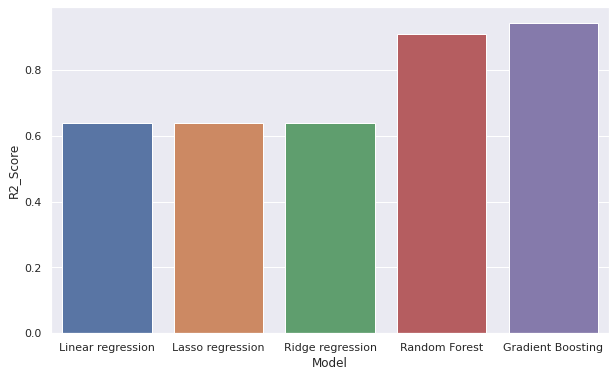

In [142]:
plt.figure(figsize=(10,6))
sns.barplot(x=Training_DF['Model'], y= Training_DF['R2_Score'])

<Axes: xlabel='Model', ylabel='MSE'>

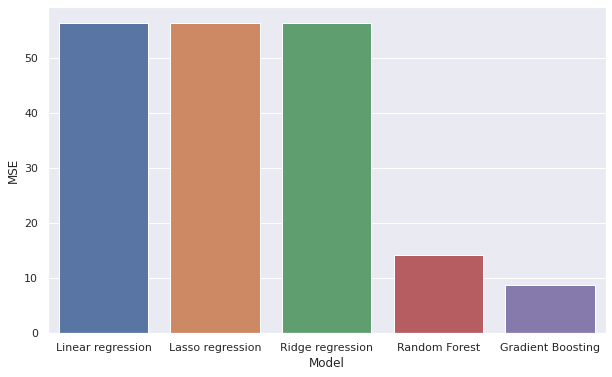

In [143]:
plt.figure(figsize=(10,6))
sns.barplot(x=Training_DF['Model'], y= Training_DF['MSE'])

<Axes: xlabel='Model', ylabel='R2_Score'>

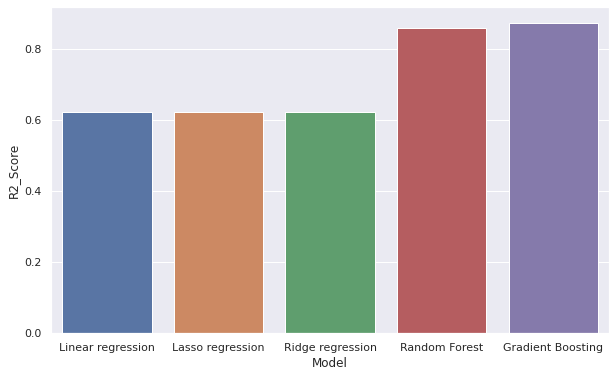

In [144]:
plt.figure(figsize=(10,6))
sns.barplot(x=Testing_DF['Model'], y= Testing_DF['R2_Score'])

<Axes: xlabel='Model', ylabel='MSE'>

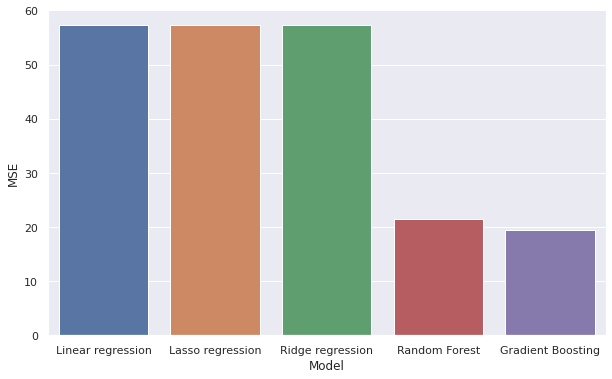

In [145]:
plt.figure(figsize=(10,6))
sns.barplot(x=Testing_DF['Model'], y= Testing_DF['MSE'])

# **10. Model Explainability**

**Model Explaination by using Module SHAP**



In [154]:
def shap_summary(model):
  explainer=shap.Explainer(model= model, masker=x_train)
  shap_values= explainer.shap_values(x_train)
  shap.summary_plot(shap_values, x_train, feature_names= ind_df.columns)


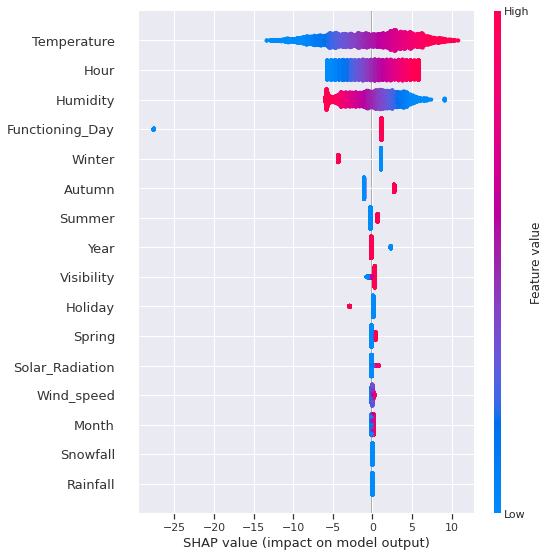

In [155]:
###Linear Regression
shap_summary(model_1)

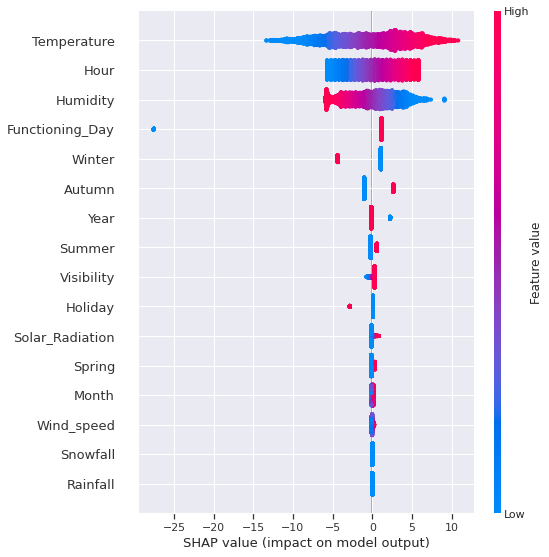

In [148]:
### Lasso Regression
shap_summary(model_2)

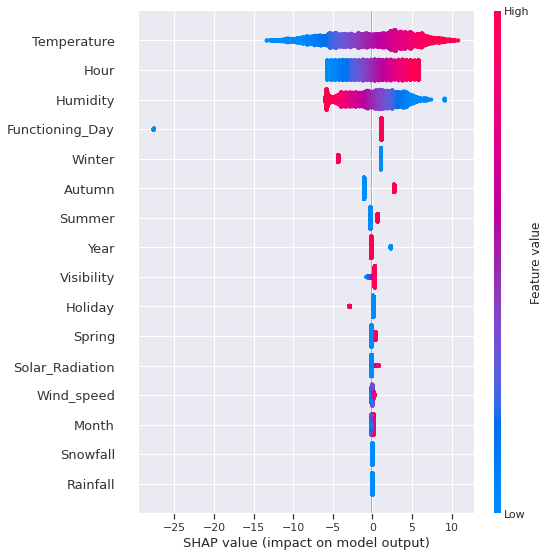

In [149]:
### Ridge Regression
shap_summary(model_3)

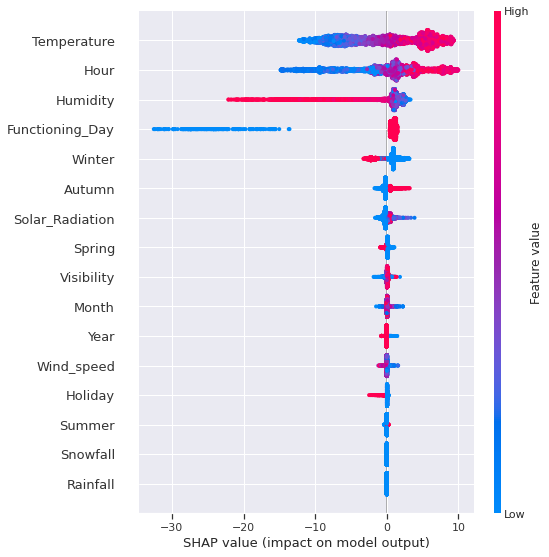

In [150]:
## Model Explaination Random Forest Regressor
explainer=shap.TreeExplainer(model_4, masker=x_train)
shap_values= explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train, feature_names= ind_df.columns)

100%|===================| 6124/6132 [00:34<00:00]       

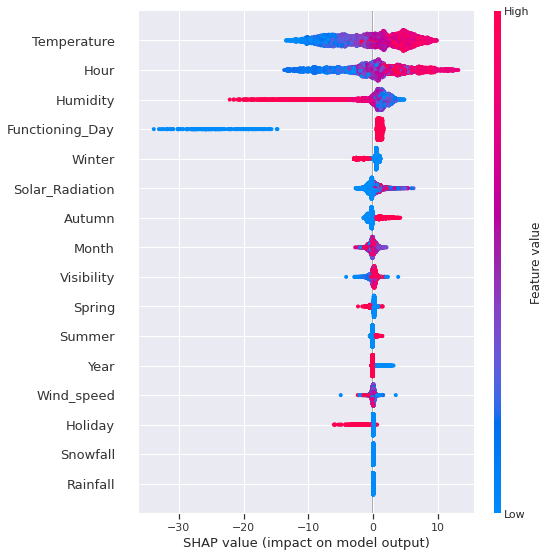

In [151]:
###Gradient Boosting Regressor
shap_summary(model_5)

# **11. Conclusions**



1.   EDA Outcomes

*   The use of bikes is high in between the months of MAY and OCTOBER.
*   The bikes are using while reaching and leaving office hours.
*   The count of rental bikes is high in summer,  Demand is very low in Winter.
*   The use of bikes is high, when the temperature ranges between 25 and 30  degrees.


2.   Data Quality Issues

*   Outliers available, they are removed.
*   Multicollinearity
*   Correlation
*   Feature Encoding


3. Model Outcomes

*   Among all models, Random Forest and Gradient Boosting are worked better.
*   Temperature, Humidity, Hour and Functionalday are the most influencing features on Count of Rental Bikes.
*   Linear, Lasso and Ridge Models giving poor results as they are giving r2_score of 0.622, where as the Random forest and Gradient Boosting models giving as 0.858 and 0.873 respectively.
*   Ensemble Modeling is preferred as the Mean Squared Error is drastically decreased with Random Forest and Gradient Boosting Regressor.






